In [1]:
import numpy as np
#import matplotlib.pyplot as plt
import corner
import emcee
from invisoplanet_detection.statistics import *

In [2]:
# Setup the likelihood object
known_bodies = 2
unknown_bodies = 1
parameters_filename = "invisoplanet_detection/data/sun_jup_2_0_1.json"
max_masses = np.array([1e-3])  #Actual mass x2, or small value if actual mass is 0
surrogate_points = 9

# Optional arguments for Likelihood (these are the default values)
num_iterations = 20_000     
time_step = 0.5
last_n = 100        

# Construct the likelihood object
likelihood_SUN_JUP = Likelihood(known_bodies, unknown_bodies, parameters_filename, max_masses, surrogate_points, num_iterations, time_step, last_n)
 

Mass 1 list: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:52<00:00,  5.88s/it]


In [10]:
#Setup the MCMC
#likelihood.log_posterior_variable_eta((guess_masses, eta), x = None, y = None, yerr = None)
num_walker = 16
num_dim = 2
num_iter = 5000
init_pos = np.random.randn(num_walker, num_dim) @ np.array([[10**(-6), 0],[0, 10]])

#Run the MCMC
sampler = emcee.EnsembleSampler(num_walker, num_dim, likelihood_SUN_JUP.log_posterior_variable_eta)
sampler.run_mcmc(init_pos, num_iter, progress=True);

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:10<00:00, 70.99it/s]


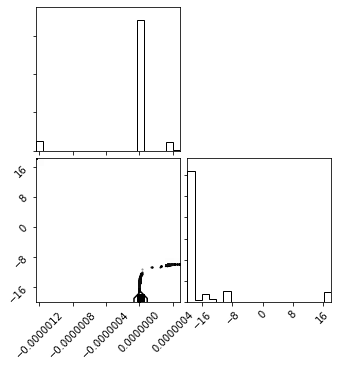

In [11]:
samples = sampler.get_chain()
flat_samples = sampler.get_chain(discard=100, flat=True)
fig = corner.corner(flat_samples);

In [14]:
#Setup the MCMC
#likelihood.log_posterior_variable_eta((guess_masses, eta), x = None, y = None, yerr = None)
num_walker = 16
num_dim = 1
num_iter = 5000
init_pos = 10**(-8) * np.random.randn(num_walker, 1)

likelihood_SUN_JUP.set_eta(0.0007)

#Run the MCMC
sampler = emcee.EnsembleSampler(num_walker, num_dim, likelihood_SUN_JUP.log_posterior)
sampler.run_mcmc(init_pos, num_iter, progress=True);

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:52<00:00, 96.10it/s]


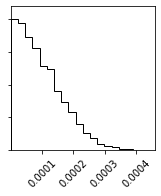

In [15]:
samples = sampler.get_chain()
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(flat_samples);